# Восстановление золота из руды

Нам необходимо создать прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.



## Подготовка данных

По условиям задачи мне необходимо  обучить модель для предсказания коэффициента восстановления золота из золотосодержащей руды, с целью оптимизации производства.

Для решения задачи необходимо будет выполнить следующие шаги:
- Загрузим и изучим данные;
- Проведем их предобработку;


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from numpy.random import RandomState
from sklearn.metrics import make_scorer, mean_absolute_error


### Загрузка данных

Загрузим данные и посмотрим на их содержимое.

In [ ]:
try:
    data_train = pd.read_csv('gold_recovery_train_new.csv')
except:
    data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_train.head(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [ ]:
try:
    data_test = pd.read_csv('gold_recovery_test_new.csv')
except:
    data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_test.head(5)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [ ]:
try:
    data_full = pd.read_csv('gold_recovery_full_new.csv')
except:
    data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
data_full.head(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [ ]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


Очень много данных... 

Есть небольшое количество пропусков, которые заполню на стадии предобработки данных, а так же в столбце 'date' данные имеют тип object. Возможно, следует заменить на тип datetime, но не уверен, что имеет смысл

### Проверка эффективности обогощения

По условиям задачи нам необходимо убедиться в правильности расчета эффективности обогащения. Для этой цели используем формулу расчета эффективности: 

recovery = ((C(F-T))/(FC-T))*100%, где:

- С - rougher.output.concentrate_au - доля золота концентрате после фильтрации/очитски
- F - rougher.input.feed_au - доля золота в сырье/концентрате до флотации/очистки
- T - rougher.output.tail_au - доля золота в отвальных хвостах после фильтрации/очистки

После чего найдем МАЕ между собственными расчетами и значением признака.


In [ ]:
C = data_train['rougher.output.concentrate_au']
F = data_train['rougher.input.feed_au']
T = data_train['rougher.output.tail_au']
recovery = ((C*(F-T))/(F*(C-T))) * 100

print('MAE между расчетами и значением признака: ', mean_absolute_error(data_train['rougher.output.recovery'], recovery))

MAE между расчетами и значением признака:  9.73512347450521e-15


Показатель МАЕ достаточно низкий, что говорит о том что предсказания не значительно отличаются от истинных значений.

### Анализ недоступных признаков

Тестовая выборка содержит значительно меньше столбцов, чем обучающая и полная (53 против 87).

Посмотрим.

In [ ]:
set(data_train.columns) - set(data_test.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

В основном в тестовой выборке отсутствуют столбцы содержащие данные о параметрах продукта. Но так же нет столбцов rougher.output.recovery и final.output.recovery, которые содержат целевые признаки. Их необходимо будет добавить из полной выборки.

### Подготовка данных

Добавим столбцы rougher.output.recovery и final.output.recovery в тестовую выборку методом merge.

In [ ]:
data_test = data_test.merge(data_full.loc[:, ['date','rougher.output.recovery','final.output.recovery']], on='date')

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5290 entries, 0 to 5289
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

Получилось.

Заполним пропуски методом ffill.

In [ ]:
data_train = data_train.ffill(axis=0)
data_test = data_test.ffill(axis=0)
data_full = data_full.ffill(axis=0)

И удалим столбец data,  так как он не несет никакой информативной пользы.

In [ ]:
data_train = data_train.drop('date', axis=1)
data_test = data_test.drop('date', axis=1)

Можно переходить непосредственно к анализу

## Анализ данных

Построим графики, чтобы определить распределение концентрации золота, серебра и свинца на всех этапах отчистки.

### Распределение концентрации золота на этапах отчистки.

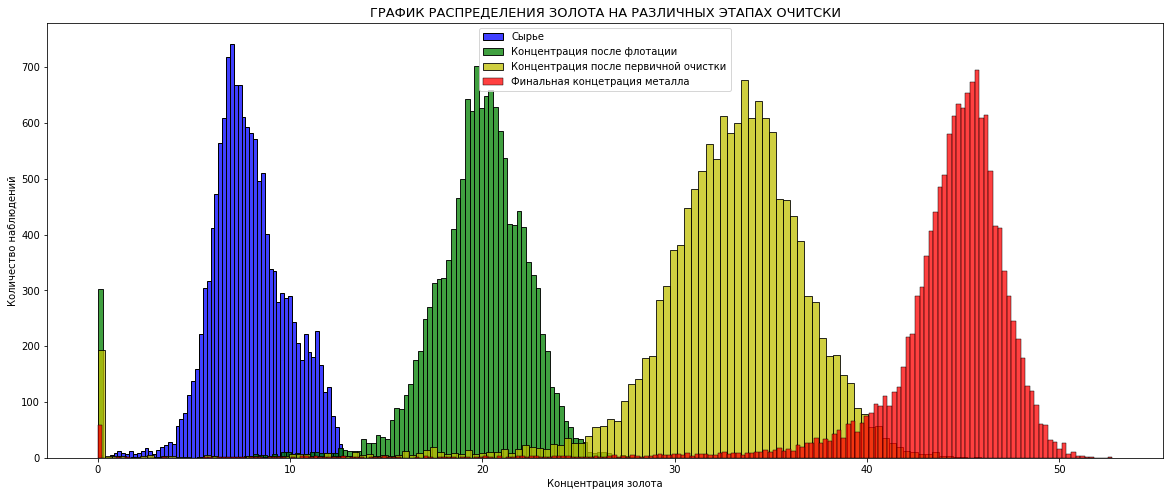

In [ ]:
plt.figure(figsize=[20, 8])
plt.title(f'ГРАФИК РАСПРЕДЕЛЕНИЯ ЗОЛОТА НА РАЗЛИЧНЫХ ЭТАПАХ ОЧИТСКИ', fontsize=13)
sns.histplot(data_train[f'rougher.input.feed_au'], color='b', label='Сырье', kde=False)
sns.histplot(data_train[f'rougher.output.concentrate_au'], color='g', label='Концентрация после флотации', kde=False)
sns.histplot(data_train[f'primary_cleaner.output.concentrate_au'], color='y', label='Концентрация после первичной очистки', kde=False)
sns.histplot(data_train[f'final.output.concentrate_au'], color='r', label='Финальная концетрация металла',kde=False)
plt.xlabel('Концентрация золота')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.show()

На каждом этапе отчистки концентрация золота увеличивается. Видимо, само производство нацелено на добычу золота, другие металлы скорее всего сопутствующий бонус

### Распределение концентрации свинца на этапах отчистки.

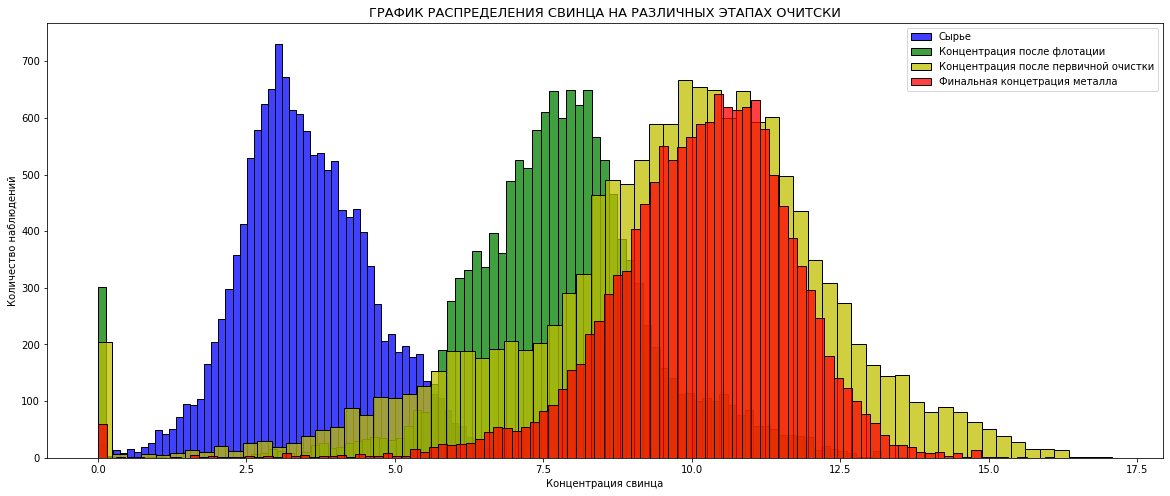

In [ ]:
plt.figure(figsize=[20, 8])
plt.title(f'ГРАФИК РАСПРЕДЕЛЕНИЯ СВИНЦА НА РАЗЛИЧНЫХ ЭТАПАХ ОЧИТСКИ', fontsize=13)
sns.histplot(data_train[f'rougher.input.feed_pb'], color='b', label='Сырье', kde=False)
sns.histplot(data_train[f'rougher.output.concentrate_pb'], color='g', label='Концентрация после флотации', kde=False)
sns.histplot(data_train[f'primary_cleaner.output.concentrate_pb'], color='y', label='Концентрация после первичной очистки', kde=False)
sns.histplot(data_train[f'final.output.concentrate_pb'], color='r', label='Финальная концетрация металла',kde=False)
plt.xlabel('Концентрация свинца')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.show()

Концентрация свинца, как и золота, растет отэтапа к этапу, но после первичной очистки остается примерно одинаковой в сравнении с финальной концентрацией

### Распределение концентрации серебра на этапах отчистки.

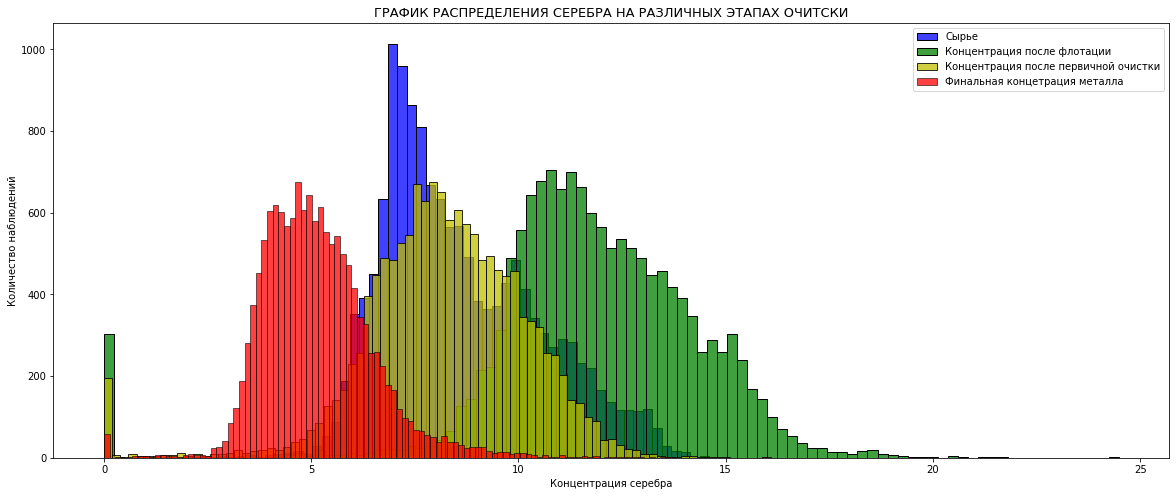

In [ ]:
plt.figure(figsize=[20, 8])
plt.title(f'ГРАФИК РАСПРЕДЕЛЕНИЯ СЕРЕБРА НА РАЗЛИЧНЫХ ЭТАПАХ ОЧИТСКИ', fontsize=13)
sns.histplot(data_train[f'rougher.input.feed_ag'], color='b', label='Сырье', kde=False)
sns.histplot(data_train[f'rougher.output.concentrate_ag'], color='g', label='Концентрация после флотации', kde=False)
sns.histplot(data_train[f'primary_cleaner.output.concentrate_ag'], color='y', label='Концентрация после первичной очистки', kde=False)
sns.histplot(data_train[f'final.output.concentrate_ag'], color='r', label='Финальная концетрация металла',kde=False)
plt.xlabel('Концентрация серебра')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.show()

Тут мы видим обратную ситуацию. Концентрация серебра снижается от этапа к этапу.

### Сравнение гранул сырья.

Для корректной работы моделейнам необходимо убедиться, что распределение размеров гранул сырья в обучающей и тестовой выборках отличаются незначительно.

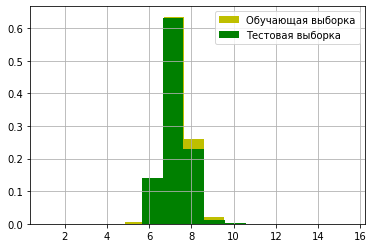

In [ ]:
data_train['primary_cleaner.input.feed_size'].hist(color='y', label='Обучающая выборка', density=True)
data_test['primary_cleaner.input.feed_size'].hist(color='g', label='Тестовая выборка', density=True)
plt.legend()

Распределение размеров гранул сырья в тестовой и обучающей выборках практически не отличаются.

### Суммарная концентрация 

Посчитаем суммарную концентрацию металлов на разных стадиях обработки, а именно на стадии сырья (rougher_input), после флотации (rougher_output) и финальной обработки (final_output)

Введем новые переменные.

In [ ]:
common_concentrate_rougher_input = 0
common_concentrate_rougher_output = 0
common_concentrate_final_output = 0

И посчитаем

In [ ]:
for metal in ['au', 'ag', 'pb']:
    common_concentrate_rougher_input += data_train[f'rougher.input.feed_{metal}']
    common_concentrate_rougher_output += data_train[f'rougher.output.concentrate_{metal}']
    common_concentrate_final_output += data_train[f'final.output.concentrate_{metal}']

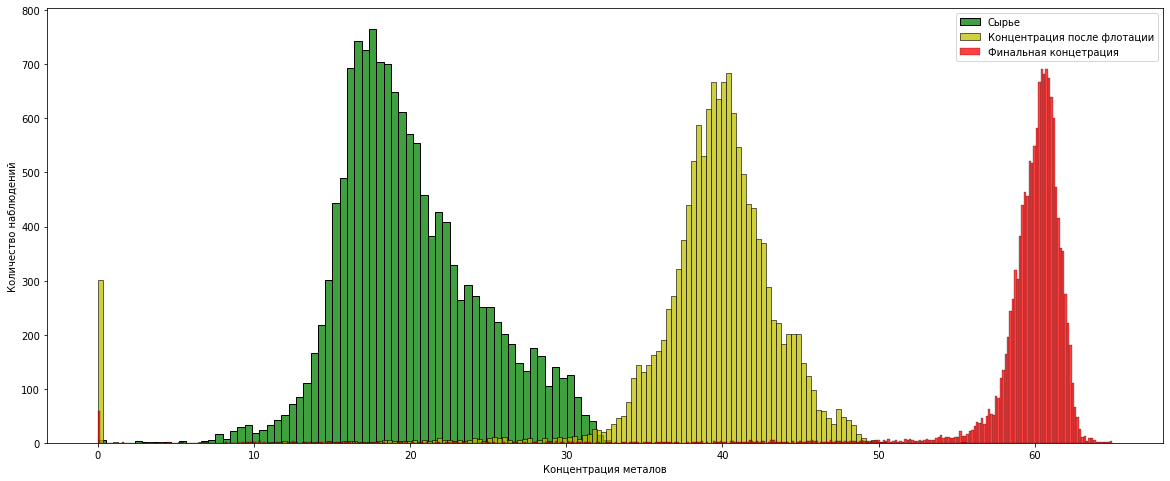

In [ ]:
plt.figure(figsize=[20, 8])
sns.histplot(common_concentrate_rougher_input, color='g', label='Сырье')
sns.histplot(common_concentrate_rougher_output, color='y', label='Концентрация после флотации')
sns.histplot(common_concentrate_final_output, color='r', label='Финальная концетрация')
plt.xlabel('Концентрация металов')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.show()

Суммарная концентрация металлов увеличивается от этапа к этапу

In [ ]:
data_train = data_train[(data_train['rougher.output.concentrate_au'] != 0) & (data_train['rougher.output.concentrate_ag'] != 0) & (data_train['rougher.output.concentrate_pb'] != 0)]
data_train = data_train[(data_train['final.output.concentrate_au'] != 0) & (data_train['final.output.concentrate_ag'] != 0) & (data_train['final.output.concentrate_pb'] != 0)]

data_full = data_full[(data_full['rougher.output.concentrate_au'] != 0) & (data_full['rougher.output.concentrate_ag'] != 0) & (data_full['rougher.output.concentrate_pb'] != 0)]
data_full = data_full[(data_full['final.output.concentrate_au'] != 0) & (data_full['final.output.concentrate_ag'] != 0) & (data_full['final.output.concentrate_pb'] != 0)]


## Модель

Напишем функцию для построения итогового sMAPE

In [ ]:
def get_smape(target, predict):
    smape = (1/len(target))*np.sum((np.abs(target - predict))/( (np.abs(target)+np.abs(predict))/2))*100
    return smape

In [ ]:
def get_final_smape(rougher, final):
    result = 0.25*rougher+0.75*final
    return result

In [ ]:
smape_scorer = make_scorer(get_smape, greater_is_better = False)

И обучим модели.

Но перед тем как начать обучение моделей нам необходимо удачить из обучающей выборки признаки, которые отсутствуют в тестовой. 

In [ ]:
missed_columns = set(data_train) - set(data_test)

Оставим целевые признаки

In [ ]:
missed_columns = missed_columns - set(['rougher.output.recovery','final.output.recovery'])

In [ ]:
data_train = data_train.drop(columns=missed_columns, axis=1)

Выделим признаки для обучения моделей.

In [ ]:
features_train = data_train.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_rougher_train = data_train['rougher.output.recovery']
target_final_train = data_train['final.output.recovery']

### Линейная регрессия

In [ ]:
%%time
model_lr_rougher = LinearRegression()
smape_rougher = cross_val_score(model_lr_rougher,
                          features_train,
                          target_rougher_train,
                          scoring=smape_scorer,
                          cv=5)
final_smape_rougher = smape_rougher.mean()
model_lr_final = LinearRegression()
smape_final = cross_val_score(model_lr_final,
                        features_train,
                        target_final_train,
                        scoring=smape_scorer,
                        cv=5)
final_smape_final = smape_final.mean()
result_smape = get_final_smape(final_smape_rougher, final_smape_final)*(-1)
print('Итоговое sMAPE для линейной регрессии составляет:', result_smape)

Итоговое sMAPE для линейной регрессии составляет: 10.059602069093502
CPU times: user 739 ms, sys: 1.6 s, total: 2.34 s
Wall time: 2.42 s


### Дерево решений.

In [ ]:
%%time
state = RandomState(12345)
best_result_dt = 100
best_param_dt = 0
for n in range(1, 10, 1):
    model_dt_rougher = DecisionTreeRegressor(max_depth=n, random_state=state)
    smape_rougher = cross_val_score(model_dt_rougher,
                              features_train,
                              target_rougher_train,
                              scoring=smape_scorer,
                              cv=5)
    final_smape_rougher = smape_rougher.mean()

    model_dt_final = DecisionTreeRegressor(max_depth=n, random_state=state)
    smape_final = cross_val_score(model_dt_final, 
                                  features_train,
                                  target_final_train,
                                  scoring=smape_scorer,
                                  cv=5)
    final_smape_final = smape_final.mean()
    result_smape = get_final_smape(final_smape_rougher, final_smape_final)*(-1)
    if result_smape < best_result_dt:
        best_result_dt = result_smape
        best_param_dt = n
print('Лучший показатель итогового sMAPE для решающего древа составляет:', best_result_dt)
print('Лучшая модель решающего древа имеет глубину:', best_param_dt)


Лучший показатель итогового sMAPE для решающего древа составляет: 8.857694214162564
Лучшая модель решающего древа имеет глубину: 3
CPU times: user 22.2 s, sys: 140 ms, total: 22.3 s
Wall time: 22.4 s


С этой метрикой, кажется, еще не сталкивался. Обязаталень изучу. Спасибо.

### Случайный лес.

In [ ]:
%%time
best_result_rf = 100
best_param_rf = 0
for n in range(10, 100, 30):
    for d in range(2,10,2):
        model_rf_rougher = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=state)
        smape_rougher = cross_val_score(model_rf_rougher,
                                  features_train,
                                  target_rougher_train,
                                  scoring=smape_scorer,
                                  cv=5)
        final_smape_rougher = smape_rougher.mean()

        model_rf_final = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=state)
        smape_final = cross_val_score(model_rf_final,
                                features_train,
                                target_final_train,
                                scoring=smape_scorer,
                                cv=5)
        final_smape_final = smape_final.mean()
        result_smape = get_final_smape(final_smape_rougher, final_smape_final)*(-1)
        if result_smape < best_result_rf:
            best_result_rf = result_smape
            best_param_n = [n]
            best_param_d = [d]
print('Лучший показатель итогового sMAPE для случайного леса составляет:', best_result_rf)
print('Лучшая модель случайного леса имеет глубину:', best_param_d, 'и количество деревьев', best_param_n)

Лучший показатель итогового sMAPE для случайного леса составляет: 8.473625873814436
Лучшая модель случайного леса имеет глубину: [4] и количество деревьев [70]
CPU times: user 11min 53s, sys: 876 ms, total: 11min 54s
Wall time: 11min 57s


Лучший показатель sMAPE у случайного леса с максимальной глубиной 4 и количеством деревьев 70

### Модель для тестовой выборки

Подготовим признаки для тестовой модели.

In [ ]:
features_test = data_test.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_rougher_test = data_test['rougher.output.recovery']
target_final_test = data_test['final.output.recovery']

In [ ]:
model_rougher = RandomForestRegressor(n_estimators=70, max_depth=4, random_state=state)
model_rougher.fit(features_train, target_rougher_train)
predicted_rougher = model_rougher.predict(features_test)

model_final = RandomForestRegressor(n_estimators=70, max_depth=4, random_state=state)
model_final.fit(features_train, target_final_train)
predicted_final = model_final.predict(features_test)

smape_test_rougher = get_smape(target_rougher_test, predicted_rougher)
smape_test_final = get_smape(target_final_test, predicted_final)
final_smape_test = get_final_smape(smape_test_rougher, smape_test_final)

In [ ]:
print('SMAPE для тестовой выборки составляет:', final_smape_test)

Сравним с константной моделью

In [ ]:
from sklearn.dummy import DummyRegressor

In [ ]:
dummy_rougher = DummyRegressor(strategy="mean")
dummy_final = DummyRegressor(strategy="mean")

dummy_rougher.fit(features_train, target_rougher_train)
dummy_final.fit(features_train, target_final_train)

dummy_predicted_rougher = dummy_rougher.predict(features_test)
dummy_predicted_final = dummy_final.predict(features_test)

smape_const_rougher = get_smape(target_rougher_test, dummy_predicted_rougher)
smape_const_final = get_smape(target_final_test, dummy_predicted_final)

final_smape_const = get_final_smape(smape_const_rougher, smape_const_final)
print('Показатель SMAPE для константной модели:', final_smape_const)

if final_smapу_test < final_smape_const:
    print('Показатель константной модели больше чем показатель тестовой выборки. Модель обучена корректно')
else:
    print('Показатель константной модели меньше чем показатель тестовой выборки. Модель обучена некорректно')

Показатель SMAPE для константной модели: 9.82279305388574
Показатель константной модели больше чем показатель тестовой выборки. Модель обучена корректно


## Вывод 

В результате проведения исследования было выяснено, что по мере прохождения этапов обработки сырья концентрация золота и свинца увеличивается, в то время как концентрация серебря уменьщается. Так же стало известно, что сумарное колличество веществ так же снижается от этапа к этапу.

По условиям задания лучшей моелью для предсказания результатов стала - RandomForestRegressor